****Task #6: Decision Tree Alogrithim****

- Predict right class and graphically visualize the data using Decision Tree classifier

# 1. Importing Libraries

## 1.1 Import Numpy and Pandas Libraries

In [1]:
import pandas as pd
import numpy as np

## 1.2 Import Graphs

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

## 1.3 Import Skitlearn Libraries

In [3]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import sklearn.metrics as sm
from sklearn import tree
from sklearn.metrics import confusion_matrix

## 1.4 Import Warnings

In [4]:
import warnings
warnings.filterwarnings('ignore')

# 2. Reading and Understanding the Data

## 2.1 Loading Data

In [5]:
iris = load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

## 2.2 Reading Data

In [6]:
iris_data = pd.DataFrame(iris.data,columns=iris.feature_names)
iris_data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


## 2.3. Understanding Data

## 2.3.1 Formating Data

In [7]:
iris_data.rename(columns={'sepal length (cm)':'Sepal Length','sepal width (cm)':'Sepal Width',
                          'petal length (cm)':'Petal Length','petal width (cm)':'Petal Width'}, inplace = True)
iris_data['Species'] = iris['target']
iris_data['Species']=iris_data['Species'].apply(lambda x: iris['target_names'][x])
iris_data.head()

,Sepal Length,Sepal Width,Petal Length,Petal Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## 2.3.2 Checking Shape of Data

In [8]:
iris_data.shape

(150, 5)

## 2.3.2 Checking Information of Data

In [9]:
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal Length  150 non-null    float64
 1   Sepal Width   150 non-null    float64
 2   Petal Length  150 non-null    float64
 3   Petal Width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [10]:
iris_data.describe()

,Sepal Length,Sepal Width,Petal Length,Petal Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## 2.3.3 Checking Null Values of Data

In [12]:
iris_data.isnull().sum()

Sepal Length    0
Sepal Width     0
Petal Length    0
Petal Width     0
Species         0
dtype: int64

# 3. Data Visualisation

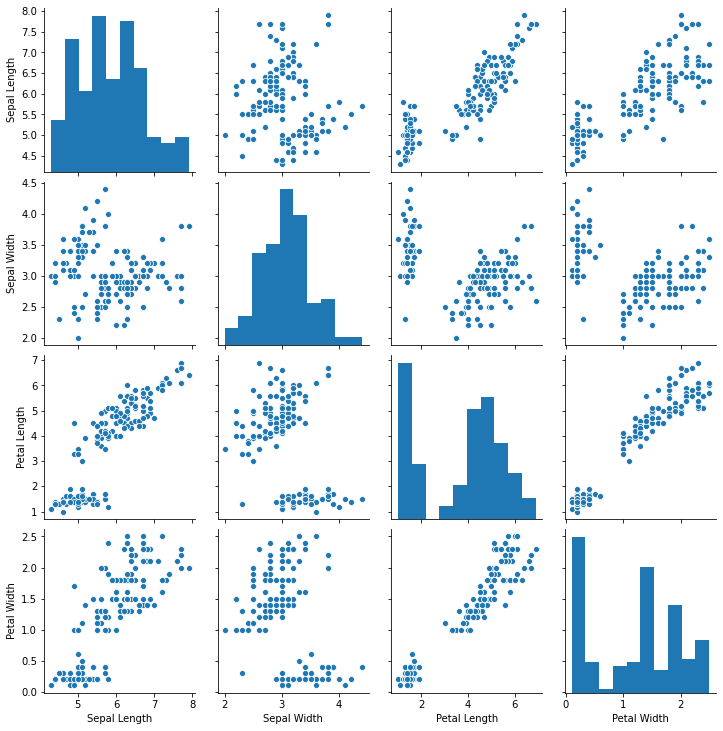

In [10]:
sns.pairplot(iris_data)
plt.show()

# 4. Preparing the data

In [9]:
X=iris_data.drop('Species',axis=1)
y=iris.target
print(X)
print(y)

     Sepal Length  Sepal Width  Petal Length  Petal Width
0             5.1          3.5           1.4          0.2
1             4.9          3.0           1.4          0.2
2             4.7          3.2           1.3          0.2
3             4.6          3.1           1.5          0.2
4             5.0          3.6           1.4          0.2
..            ...          ...           ...          ...
145           6.7          3.0           5.2          2.3
146           6.3          2.5           5.0          1.9
147           6.5          3.0           5.2          2.0
148           6.2          3.4           5.4          2.3
149           5.9          3.0           5.1          1.8

[150 rows x 4 columns]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 

In [11]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

## 5. Creating Decision Tree Algorithim

In [12]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)
print("Training Complete.")

Training Complete.


# 6. Predicting the Model

In [13]:
y_pred = dtree.predict(X_test)
y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0])

In [14]:
dtree_actual_pred = pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
dtree_actual_pred.head()

,Actual,Predicted
0,1,1
1,0,0
2,2,2
3,1,1
4,1,1


In [15]:
confusion_matrix(y_test, y_pred)

array([[19,  0,  0],
       [ 0, 13,  0],
       [ 0,  0, 13]], dtype=int64)

# 7. Building the Decision Tree Model

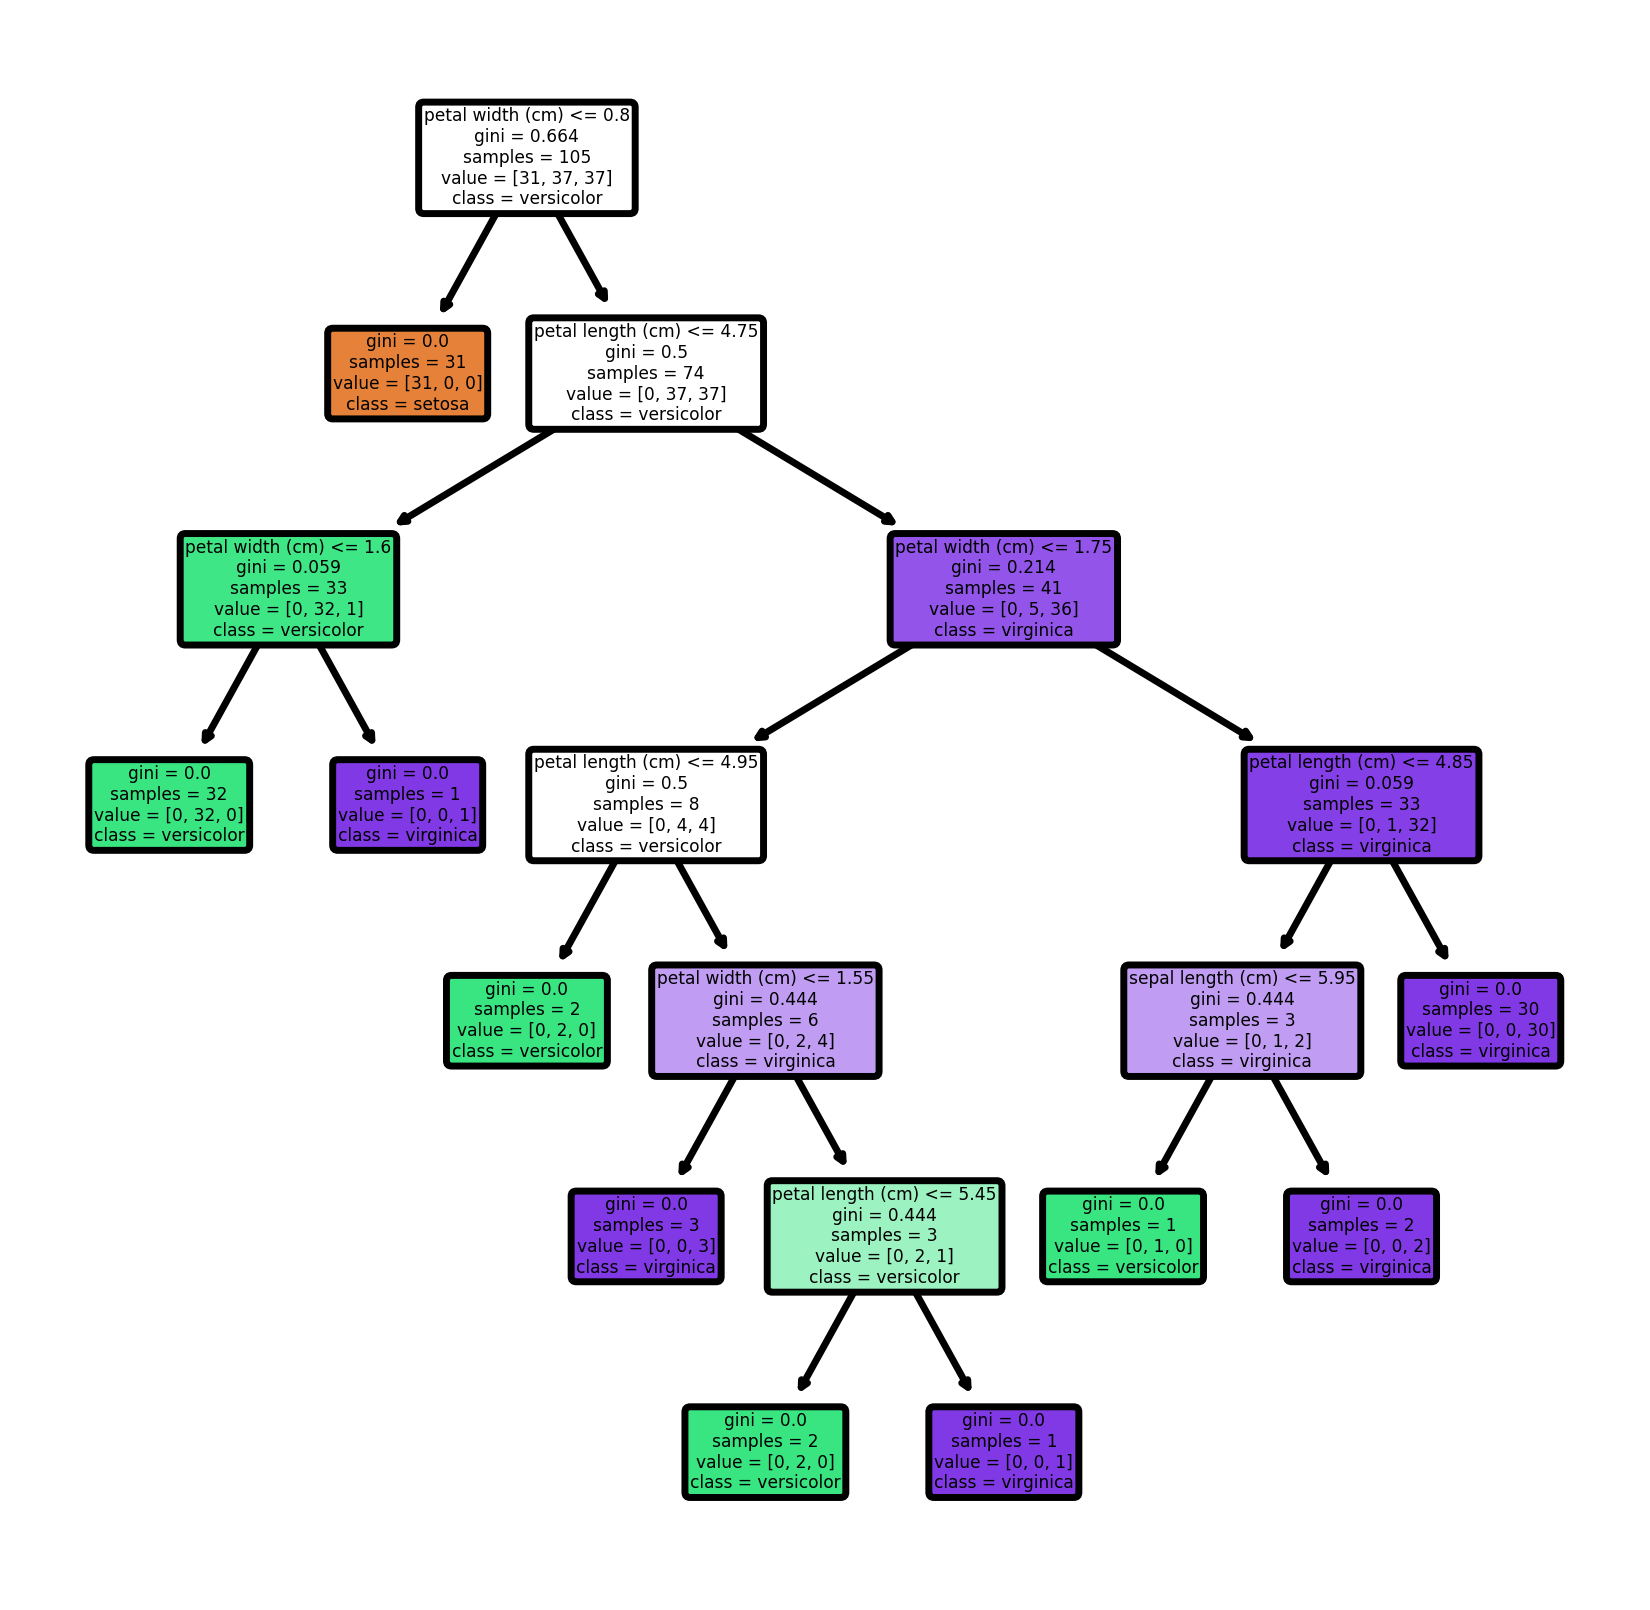

In [20]:
#Visualizing the trained Decision Tree Classifier taking all 4 features in consideration

fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (4,4), dpi = 500)

tree.plot_tree(dtree, feature_names = iris.feature_names[:], class_names = iris.target_names, filled = True,rounded=True); 

# 8. Evalauting the Model

In [24]:
print("Class Names = ",iris.target_names)

# Estimating class probabilities
print()
print("Estimating Class Probabilities for flower whose petals length width are 4.7cm and 3.2cm and sepal length and width are 1.3cm and 0.2cm. ")
print()
print('Output = ',dtree.predict([[4.7, 3.2, 1.3, 0.2]]))
print()
print("Our model predicts the class as 0, that is, setosa.")

Class Names =  ['setosa' 'versicolor' 'virginica']

Estimating Class Probabilities for flower whose petals length width are 4.7cm and 3.2cm and sepal length and width are 1.3cm and 0.2cm. 

Output =  [0]

Our model predicts the class as 0, that is, setosa.


In [17]:
print("Accuracy:",sm.accuracy_score(y_test, y_pred))

Accuracy: 1.0
